Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.0820467954684299, CNR: -0.21547952250501512
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mT.tif
SNR: 41.92056655883789, CNR: -14.919000625610352
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.3061603421587071, CNR: -0.22495717386016148
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff
SNR: 1.1278606805028146, CNR: -0.25737085132178766


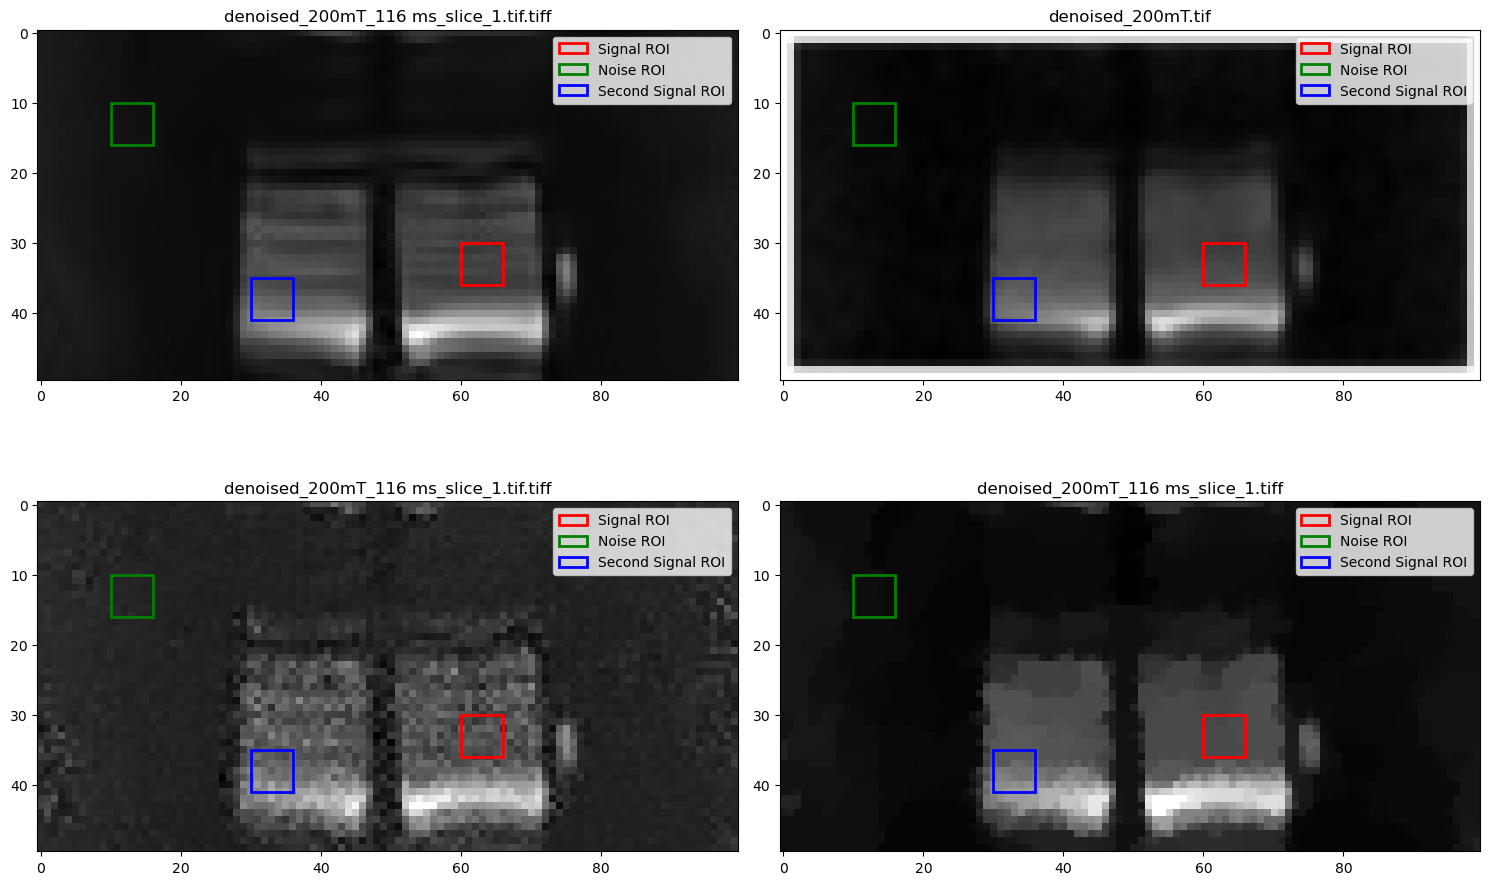

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff']

roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_20mT_32 ms_slice_1.tif.tiff
SNR: 1.0354519975753054, CNR: -0.15169166511580828
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_20mT.tif
SNR: 25.299057006835938, CNR: -8.184111595153809
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/20mT_32 ms_slice_1_denoised.tiff
SNR: 1.114221425172785, CNR: -0.15099544915042815
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_20mT_32 ms_slice_1.tiff
SNR: 1.123423131780653, CNR: -0.18341994938957723


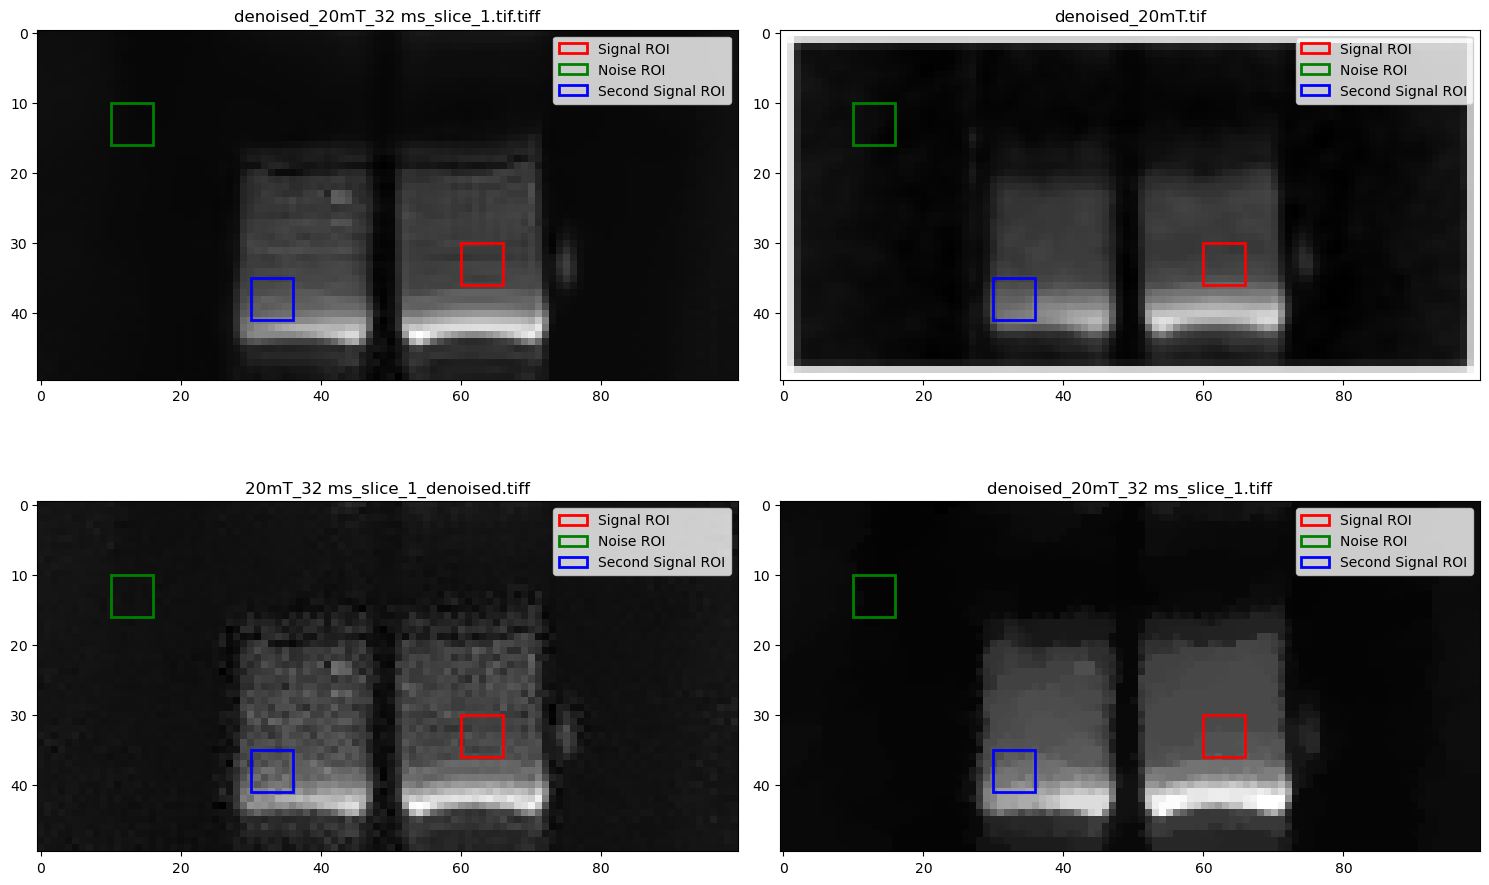

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_20mT_32 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_20mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/20mT_32 ms_slice_1_denoised.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_20mT_32 ms_slice_1.tiff']


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_2mT_131 ms_slice_1.tif.tiff
SNR: 1.183930238698988, CNR: -0.28117300242534116
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mT.tif
SNR: 30.557952880859375, CNR: -10.027838706970215
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_2mT_131 ms_slice_1.tiff
SNR: 1.1720530004897984, CNR: -0.2692554190314402
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_2mT_131 ms_slice_1.tiff
SNR: 1.1720530004897984, CNR: -0.2692554190314402


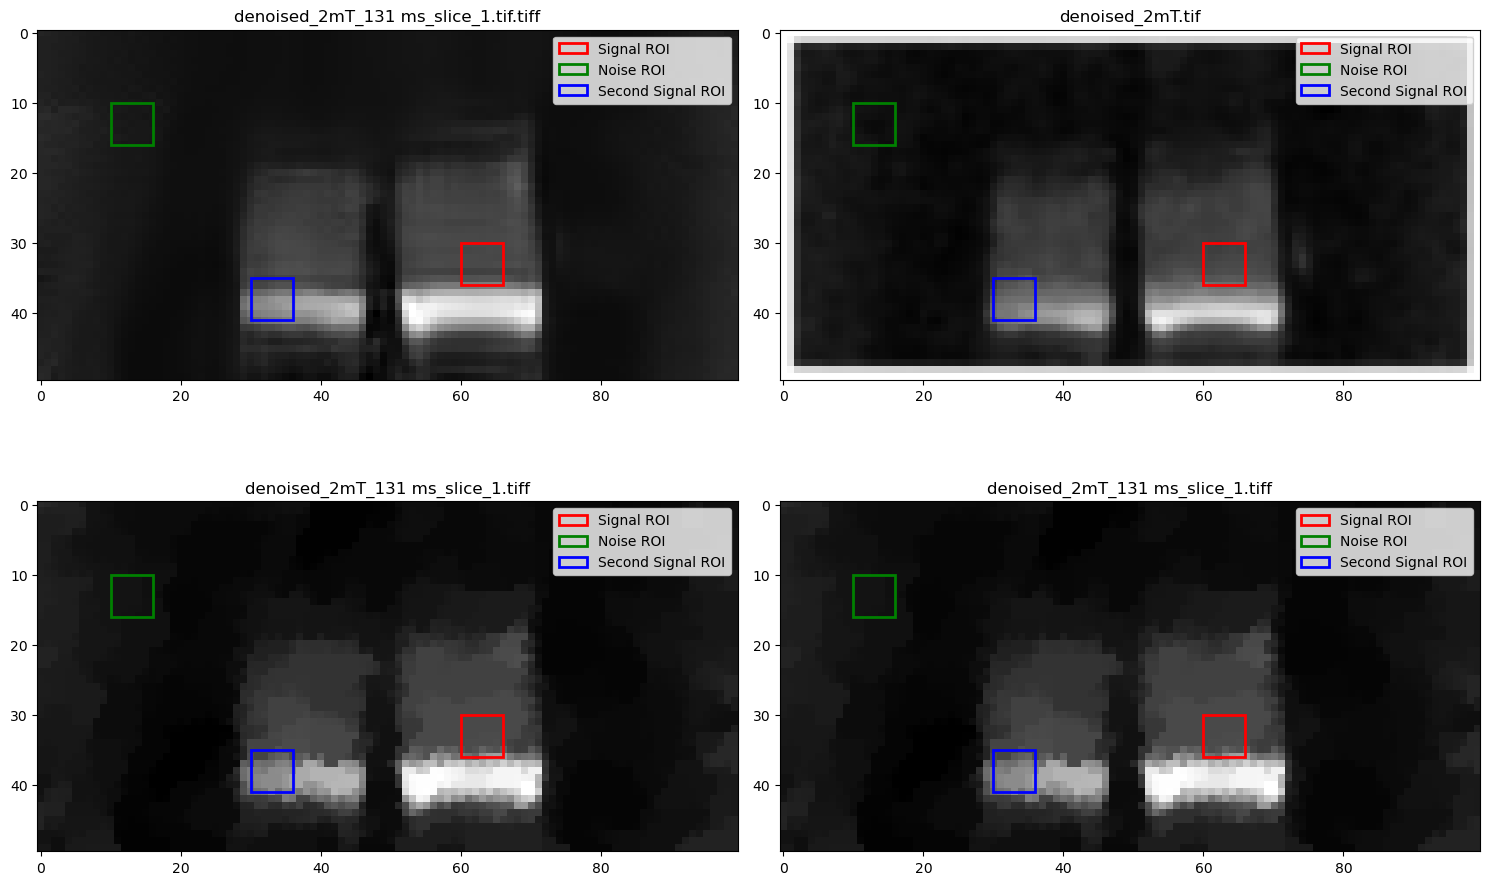

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_2mT_131 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_2mT_131 ms_slice_1.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_2mT_131 ms_slice_1.tiff']


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_0mT_36 ms_slice_1.tif.tiff
SNR: 1.2235002089247922, CNR: -0.12602030936385075
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_0mT.tif
SNR: 18.937440872192383, CNR: -4.362904071807861
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_0mT_36 ms_slice_1.tiff
SNR: 1.1190087941145892, CNR: -0.12143521100226691
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_0mT_36 ms_slice_1.tiff
SNR: 1.1190087941145892, CNR: -0.12143521100226691


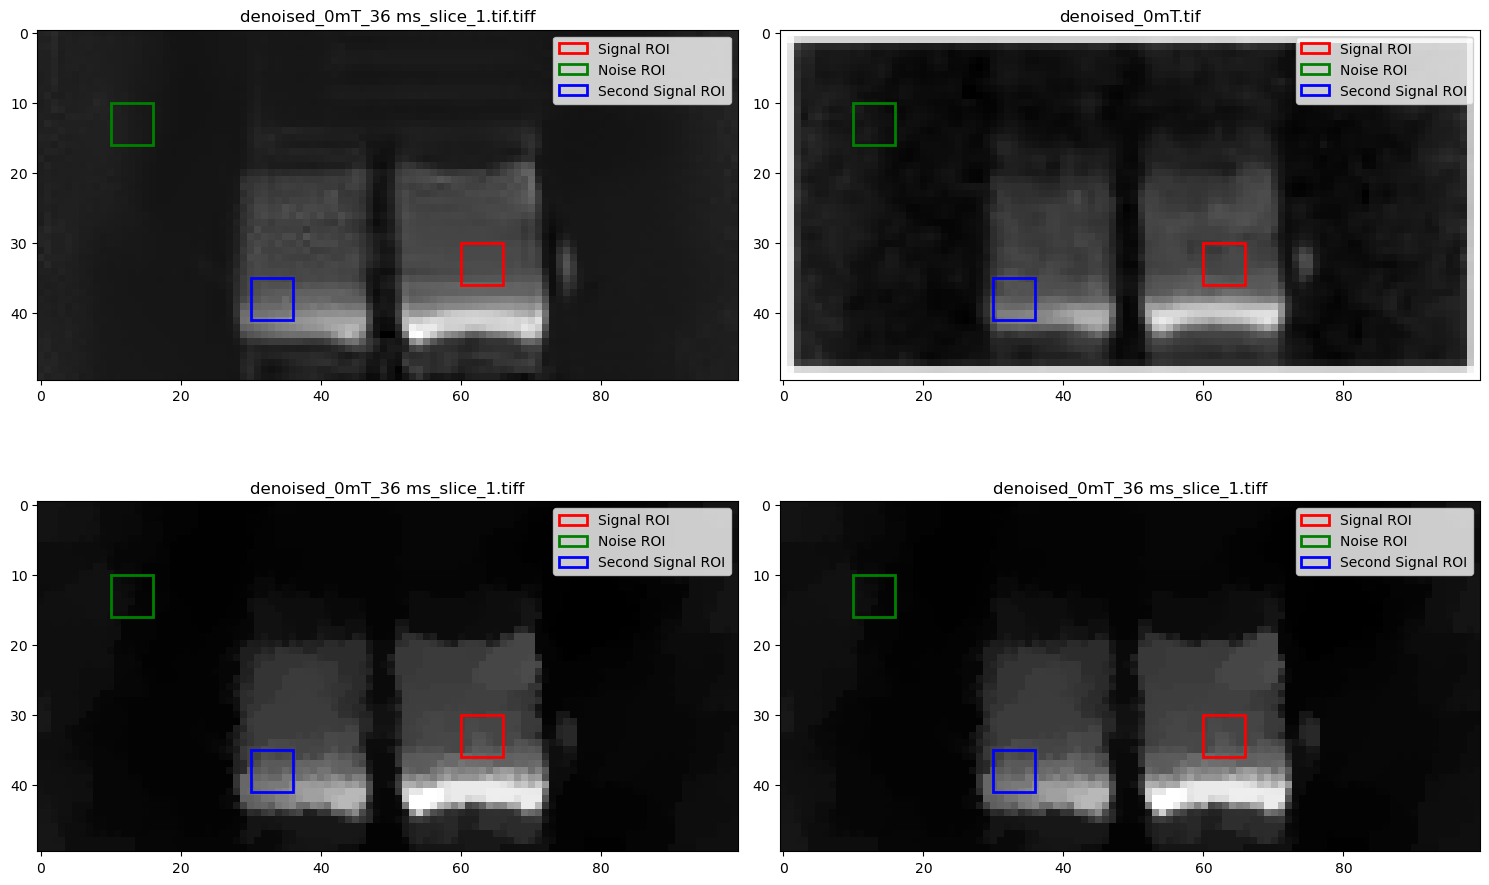

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_0mT_36 ms_slice_1.tif.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_0mT.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_0mT_36 ms_slice_1.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_0mT_36 ms_slice_1.tiff']



roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

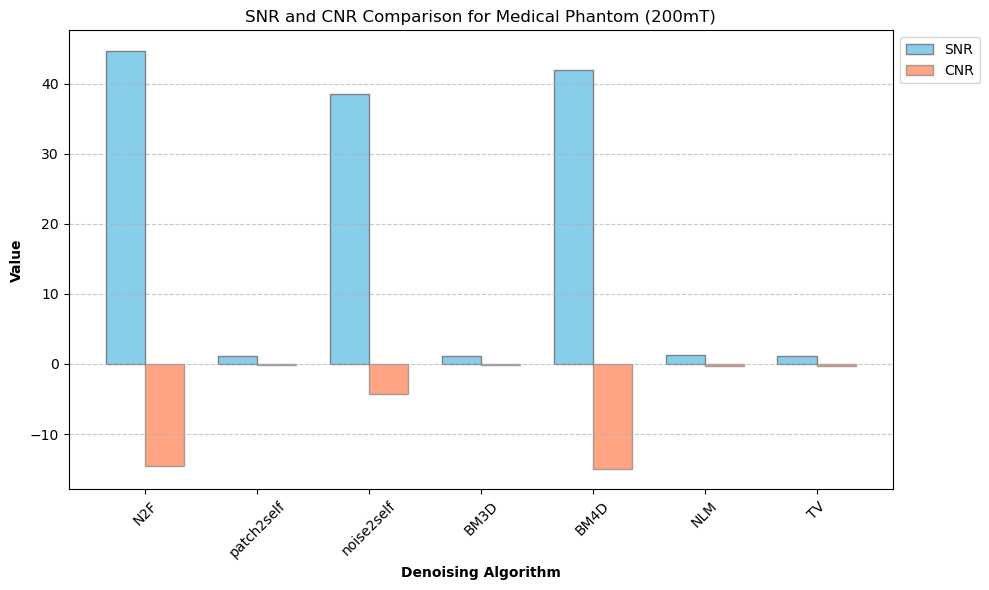

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ["N2F", "patch2self", "noise2self", "BM3D", "BM4D", "NLM", "TV"]

# SNR and CNR values
snrs = [44.6214, 1.1985, 38.4764, 1.0820, 41.9206, 1.3062, 1.1279]
cnrs = [-14.5252, -0.2171, -4.2716, -0.2155, -14.9190, -0.2249, -0.2574]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Setting the positions of the bars
barWidth = 0.35  # Width of the bars
r1 = np.arange(len(snrs))  # Positions of bars for SNR
r2 = [x + barWidth for x in r1]  # Positions of bars for CNR

# Making the plot
ax1.bar(r1, snrs, color='skyblue', width=barWidth, edgecolor='grey', label='SNR')
ax1.bar(r2, cnrs, color='coral', width=barWidth, edgecolor='grey', label='CNR', alpha=0.7)

# Adding labels
plt.xlabel('Denoising Algorithm', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(snrs))], algorithms, rotation=45)
plt.ylabel('Value', fontweight='bold')
plt.title('SNR and CNR Comparison for Medical Phantom (200mT)')

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


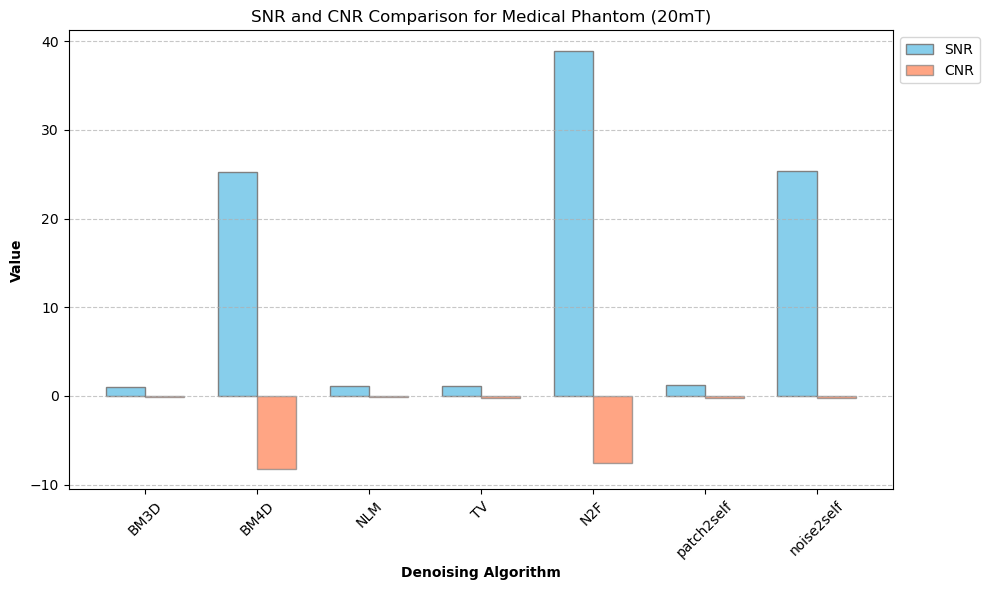

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ["BM3D", "BM4D", "NLM", "TV", "N2F", "patch2self", "noise2self"]

# SNR and CNR values for 20mT
snrs_20mt = [1.0354519975753054, 25.299057006835938, 1.114221425172785, 1.123423131780653, 38.865563662900236, 1.1934617908139513, 25.312929153442383]
cnrs_20mt = [-0.15169166511580828, -8.184111595153809, -0.15099544915042815, -0.18341994938957723, -7.5498487236321665, -0.21232229992177662, -0.26204830408096313]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Setting the positions of the bars
barWidth = 0.35  # Width of the bars
r1 = np.arange(len(snrs_20mt))  # Positions of bars for SNR
r2 = [x + barWidth for x in r1]  # Positions of bars for CNR

# Making the plot
ax1.bar(r1, snrs_20mt, color='skyblue', width=barWidth, edgecolor='grey', label='SNR')
ax1.bar(r2, cnrs_20mt, color='coral', width=barWidth, edgecolor='grey', label='CNR', alpha=0.7)

# Adding labels
plt.xlabel('Denoising Algorithm', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(snrs_20mt))], algorithms, rotation=45)
plt.ylabel('Value', fontweight='bold')
plt.title('SNR and CNR Comparison for Medical Phantom (20mT)')

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


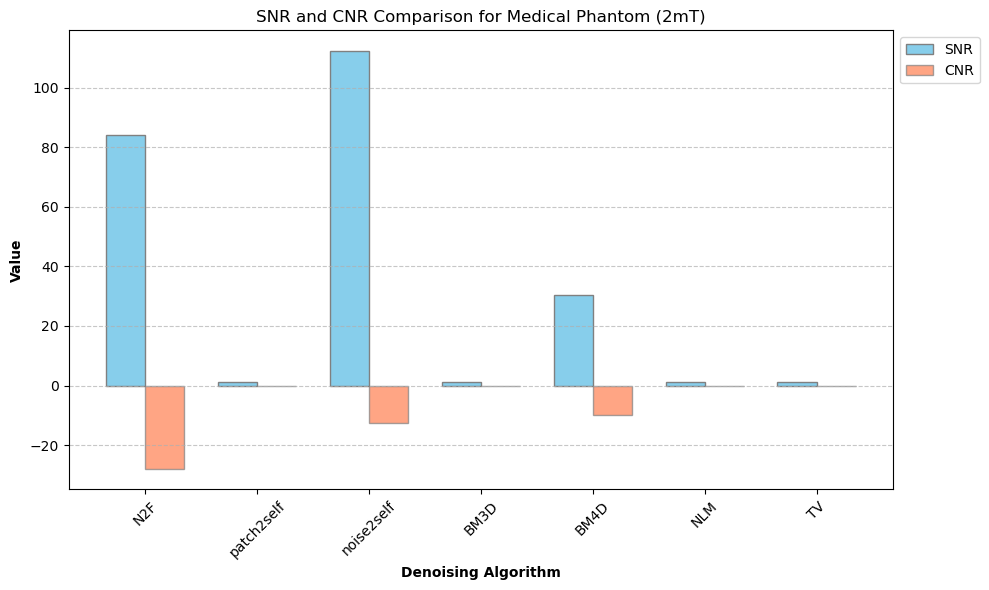

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ["N2F", "patch2self", "noise2self", "BM3D", "BM4D", "NLM", "TV"]

# SNR and CNR values for 2mT
snrs_2mt = [84.04009606526029, 1.2273654686885926, 112.3132095336914, 1.183930238698988, 30.557952880859375, 1.1720530004897984, 1.1720530004897984]
cnrs_2mt = [-27.878807010541177, -0.15082122309060572, -12.698572158813477, -0.28117300242534116, -10.027838706970215, -0.2692554190314402, -0.2692554190314402]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Setting the positions of the bars
barWidth = 0.35  # Width of the bars
r1 = np.arange(len(snrs_2mt))  # Positions of bars for SNR
r2 = [x + barWidth for x in r1]  # Positions of bars for CNR

# Making the plot
ax1.bar(r1, snrs_2mt, color='skyblue', width=barWidth, edgecolor='grey', label='SNR')
ax1.bar(r2, cnrs_2mt, color='coral', width=barWidth, edgecolor='grey', label='CNR', alpha=0.7)

# Adding labels
plt.xlabel('Denoising Algorithm', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(snrs_2mt))], algorithms, rotation=45)
plt.ylabel('Value', fontweight='bold')
plt.title('SNR and CNR Comparison for Medical Phantom (2mT)')

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


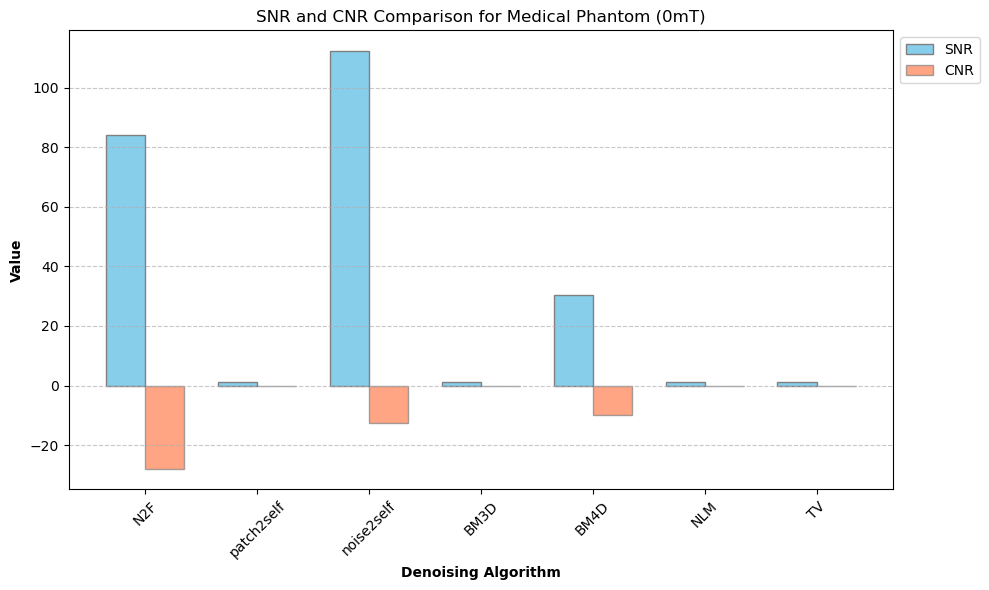

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ["N2F", "patch2self", "noise2self", "BM3D", "BM4D", "NLM", "TV"]

snrs_0mt = [84.04009606526029, 1.2273654686885926, 112.3132095336914, 1.183930238698988, 30.557952880859375, 1.1720530004897984, 1.1720530004897984]
cnrs_0mt = [-0.12602030936385075, -4.362904071807861, -0.12143521100226691, -0.12143521100226691, -6.939262145767516, -0.10439731470061353, -1.0818969011306763]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Setting the positions of the bars
barWidth = 0.35  # Width of the bars
r1 = np.arange(len(snrs_2mt))  # Positions of bars for SNR
r2 = [x + barWidth for x in r1]  # Positions of bars for CNR

# Making the plot
ax1.bar(r1, snrs_2mt, color='skyblue', width=barWidth, edgecolor='grey', label='SNR')
ax1.bar(r2, cnrs_2mt, color='coral', width=barWidth, edgecolor='grey', label='CNR', alpha=0.7)

# Adding labels
plt.xlabel('Denoising Algorithm', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(snrs_2mt))], algorithms, rotation=45)
plt.ylabel('Value', fontweight='bold')
plt.title('SNR and CNR Comparison for Medical Phantom (0mT)')

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


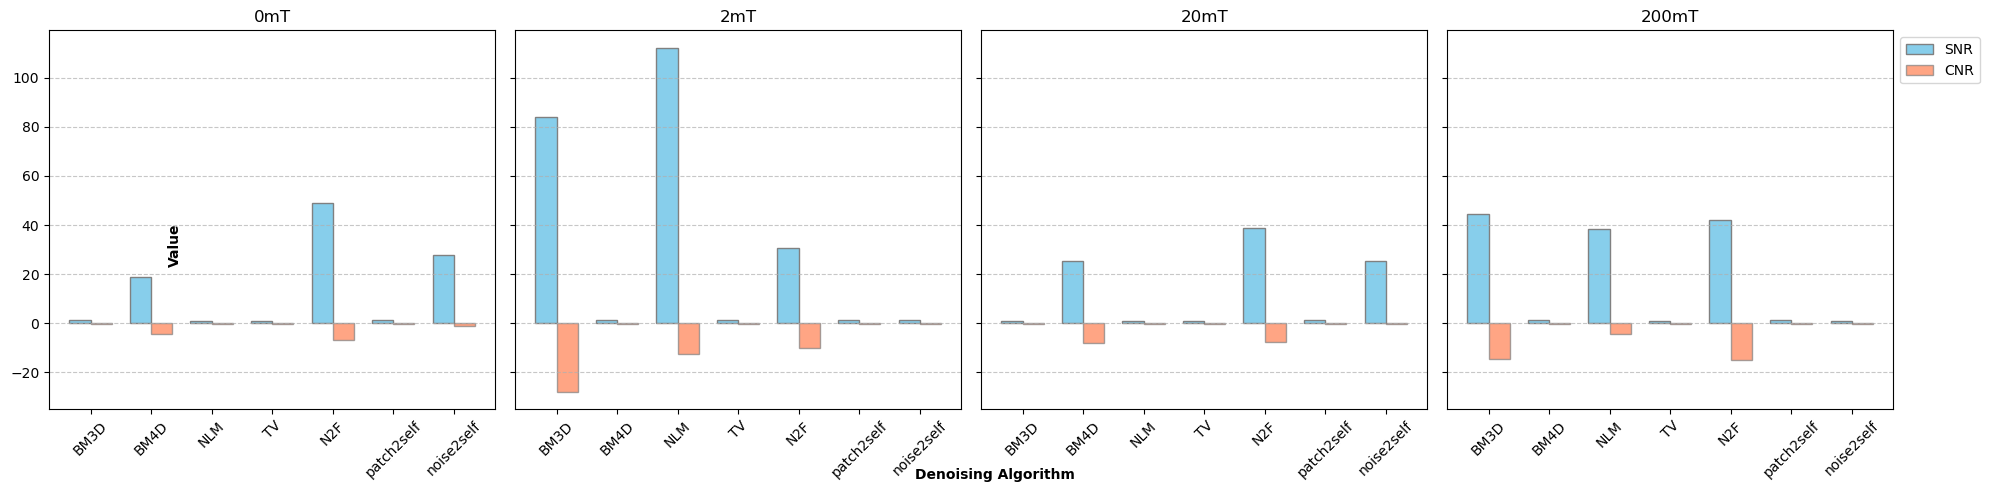

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ["BM3D", "BM4D", "NLM", "TV", "N2F", "patch2self", "noise2self"]

# SNR and CNR values organized by magnetic field strength (0mT, 2mT, 20mT, 200mT)
snr_cnr_data = {
    "0mT": {
        "SNR": [1.2235002089247922, 18.937440872192383, 1.1190087941145892, 1.1190087941145892, 48.949930271495205, 1.2986060931561607, 27.66221046447754],
        "CNR": [-0.12602030936385075, -4.362904071807861, -0.12143521100226691, -0.12143521100226691, -6.939262145767516, -0.10439731470061353, -1.0818969011306763]
    },
   "2mT" :{
          "SNR":[84.04009606526029, 1.2273654686885926, 112.3132095336914, 1.183930238698988, 30.557952880859375, 1.1720530004897984, 1.1720530004897984],
        "CNR": [-27.878807010541177, -0.15082122309060572, -12.698572158813477, -0.28117300242534116, -10.027838706970215, -0.2692554190314402, -0.2692554190314402]    },
    "20mT":{"SNR":[1.0354519975753054, 25.299057006835938, 1.114221425172785, 1.123423131780653, 38.865563662900236, 1.1934617908139513, 25.312929153442383],
"CNR":[-0.15169166511580828, -8.184111595153809, -0.15099544915042815, -0.18341994938957723, -7.5498487236321665, -0.21232229992177662, -0.26204830408096313]

        
    },
    "200mT":{
        "SNR": [44.6214, 1.1985, 38.4764, 1.0820, 41.9206, 1.3062, 1.1279],
"CNR":[-14.5252, -0.2171, -4.2716, -0.2155, -14.9190, -0.2249, -0.2574]
    }

       


   }


# Plotting
fig, axs = plt.subplots(1, len(snr_cnr_data), figsize=(20, 5), sharey=True)

for i, (field_strength, data) in enumerate(snr_cnr_data.items()):
    barWidth = 0.35
    r1 = np.arange(len(data["SNR"]))
    r2 = [x + barWidth for x in r1]
    
    axs[i].bar(r1, data["SNR"], color='skyblue', width=barWidth, edgecolor='grey', label='SNR')
    axs[i].bar(r2, data["CNR"], color='coral', width=barWidth, edgecolor='grey', label='CNR', alpha=0.7)
    
    axs[i].set_title(f'{field_strength}')
    axs[i].set_xticks([r + barWidth / 2 for r in range(len(r1))])
    axs[i].set_xticklabels(algorithms, rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Common labels
fig.text(0.5, 0.04, 'Denoising Algorithm', ha='center', va='center', fontweight='bold')
fig.text(0.09, 0.5, 'Value', ha='center', va='center', rotation='vertical', fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
